In [26]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style = 'darkgrid')


# read the data
df_books = pd.read_csv('Goodreads_Rating.csv', sep=',', header=0)
df_books['average_rating']= df_books['average_rating'].astype('float')
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13719 non-null  int64  
 1   title               13719 non-null  object 
 2   authors             13719 non-null  object 
 3   average_rating      13719 non-null  float64
 4   isbn                13719 non-null  object 
 5   isbn13              13719 non-null  int64  
 6   language_code       13719 non-null  object 
 7   # num_pages         13719 non-null  int64  
 8   ratings_count       13719 non-null  int64  
 9   text_reviews_count  13719 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


Text(0, 0.5, 'Frequency')

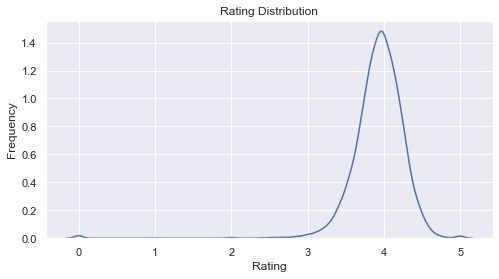

In [27]:
# average rating frecuency
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_books, x='average_rating', palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

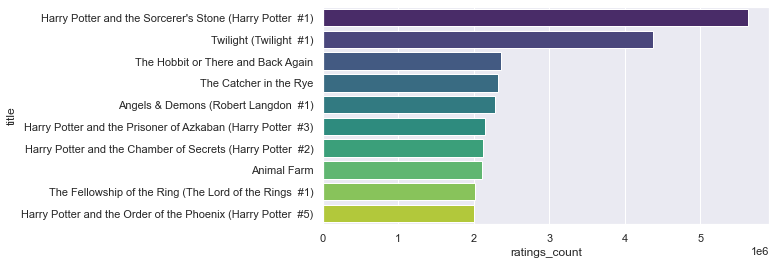

In [28]:
# highest rating books
plt.figure(figsize=(8, 4))
popular_books = df_books.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(x=popular_books, y=popular_books.index, palette='viridis')

<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

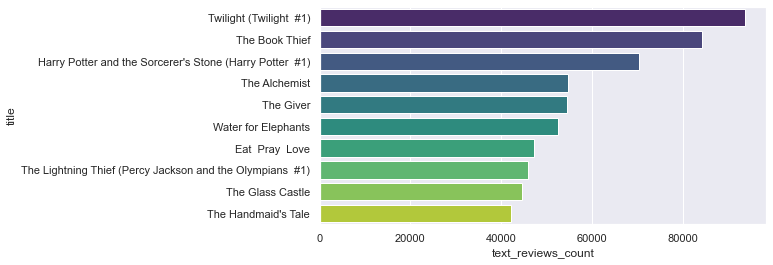

In [29]:
# highest reviewed
plt.figure(figsize=(8, 4))
most_reviewed = df_books.nlargest(10,['text_reviews_count']).set_index('title')['text_reviews_count']
sns.barplot(x=most_reviewed, y=most_reviewed.index, palette='viridis')

<AxesSubplot:xlabel='authors'>

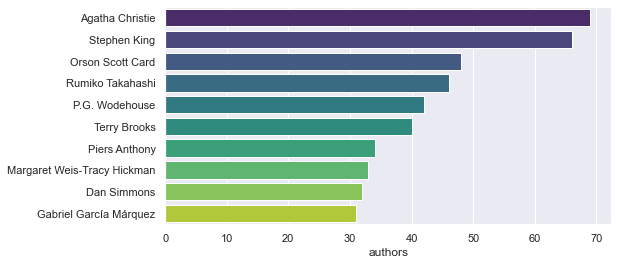

In [30]:
# authors with highest publications
plt.figure(figsize=(8, 4))
top_authors = df_books['authors'].value_counts().head(10)
sns.barplot(x=top_authors, y=top_authors.index, palette='viridis')

<AxesSubplot:xlabel='ratings_count', ylabel='authors'>

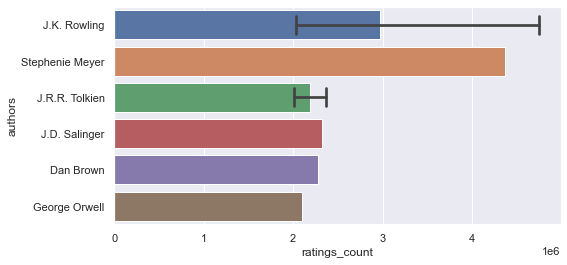

In [31]:
# highest rated authors
plt.figure(figsize=(8, 4))
popular_authors = df_books.nlargest(10,['ratings_count']).set_index('authors')['ratings_count']
sns.barplot(x=popular_authors, y=popular_authors.index, capsize=.5)

<AxesSubplot:xlabel='# num_pages', ylabel='title'>

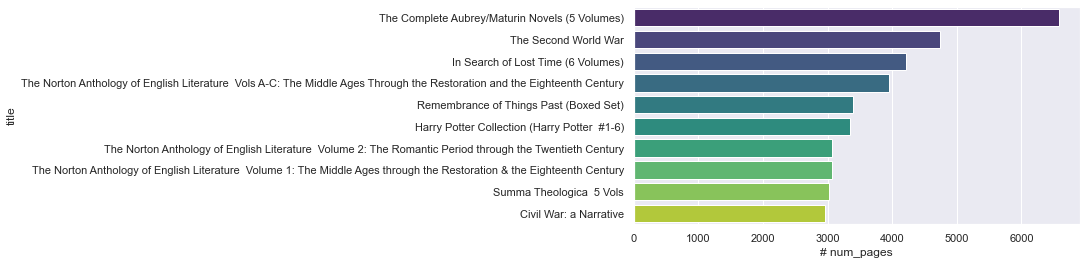

In [32]:
# top 10 longest books
plt.figure(figsize=(8, 4)) 
longest_books = df_books.nlargest(10,['# num_pages']).set_index('title')['# num_pages']
sns.barplot(data=df_books, x=longest_books, y=longest_books.index, palette='viridis')

<Figure size 576x288 with 0 Axes>

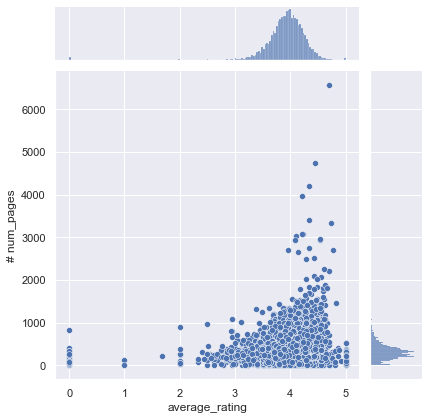

In [33]:
# distribution between n° of pages and ratings
plt.figure(figsize=(8, 4))
sns.jointplot(x = 'average_rating', y = '# num_pages', data = df_books, palette='viridis')

<Figure size 576x288 with 0 Axes>

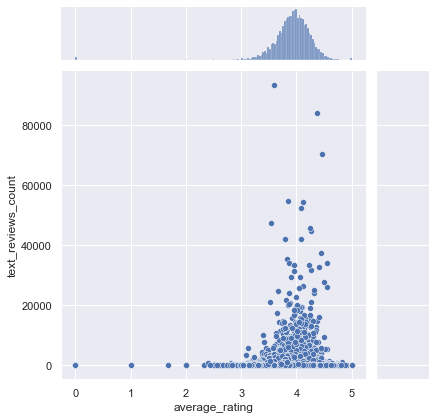

In [34]:
# distribution between text reviews and ratings
plt.figure(figsize=(8, 4))
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = df_books, palette='viridis')

<AxesSubplot:xlabel='text_reviews_count'>

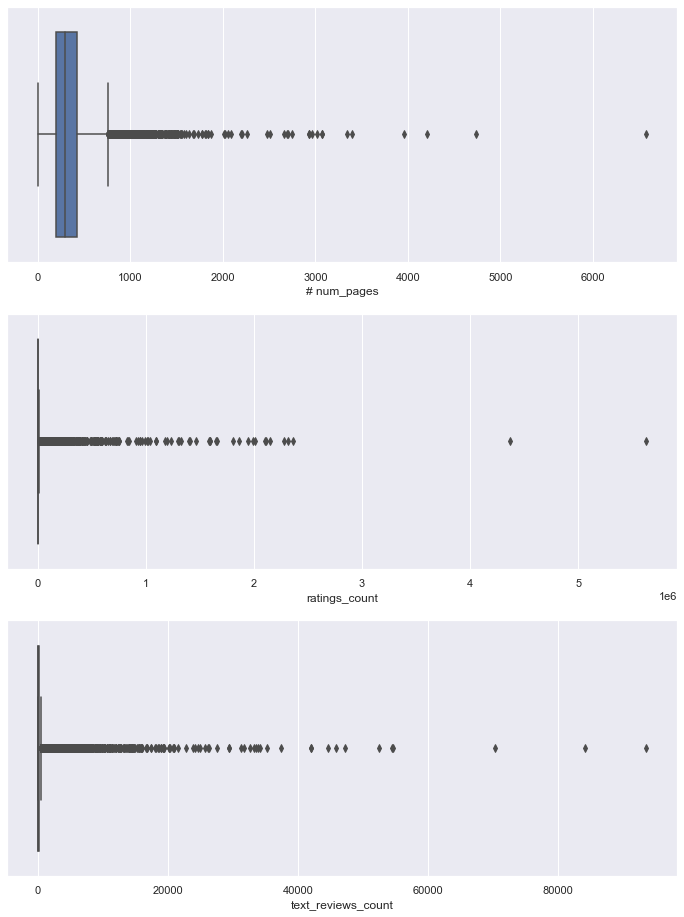

In [35]:
# find outliers
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
sns.boxplot(ax=axes[0], x=df_books['# num_pages'])
sns.boxplot(ax=axes[1], x=df_books['ratings_count'])
sns.boxplot(ax=axes[2], x=df_books['text_reviews_count'])

In [36]:
# remove outliers
df_books = df_books.drop(df_books.index[df_books['# num_pages'] >= 1000])
df_books = df_books.drop(df_books.index[df_books['ratings_count'] >= 1000000])
df_books = df_books.drop(df_books.index[df_books['text_reviews_count'] >= 20000])

In [37]:
# encoding
le = preprocessing.LabelEncoder()
df_books['title'] = le.fit_transform(df_books['title'])
df_books['authors'] = le.fit_transform(df_books['authors'])
enc_lang = pd.get_dummies(df_books['language_code'])

df_books = pd.concat([df_books, enc_lang], axis = 1)

In [38]:
# linear regression
X = df_books.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
y = df_books['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.89,3.911739
1,4.09,3.951465
2,4.01,3.936998
3,3.99,3.880779
4,3.88,3.850894
5,4.01,3.943100
6,3.30,3.920673
7,3.72,3.927141
8,3.57,3.920385
9,3.93,3.880022


<AxesSubplot:>

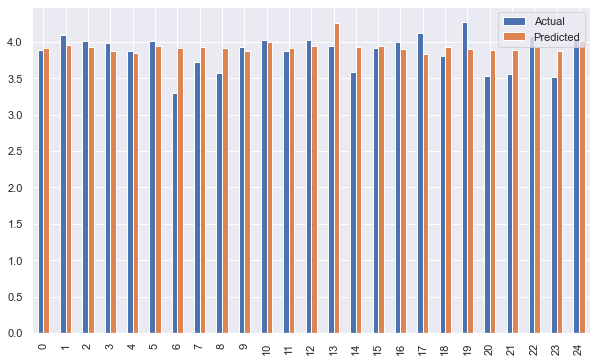

In [39]:
# visualizacion
pred.plot(kind='bar', figsize=(10, 6))